# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve, average_precision_score
)

# Load and Preprocessing

In [2]:
df = pd.read_csv('C:\Group_Project_ML2\dataset\creditcard.csv') 
df = df.sample(frac=1, random_state=42)

# Features and labels
X = df.drop(['Class'], axis=1)
y = df['Class']

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\859154709.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('C:\Group_Project_ML2\dataset\creditcard.csv')


# Visualize data 

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\3447917775.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("C:\Group_Project_ML2\dataset\creditcard.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\3447917775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


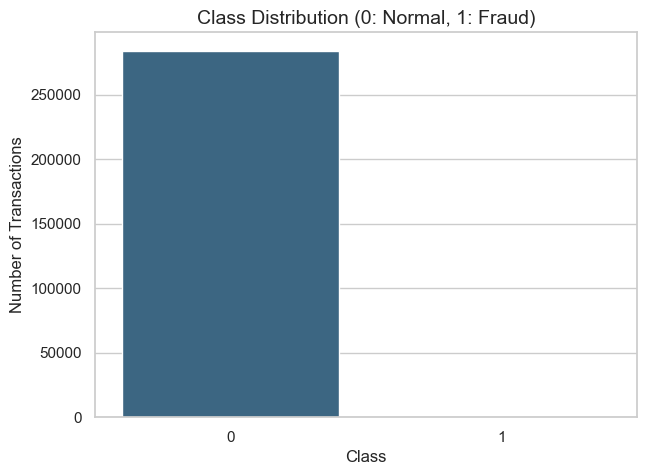

C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\3447917775.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], ax=axes[i], label='Normal', shade=True, color='blue')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\3447917775.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], ax=axes[i], label='Fraud', shade=True, color='red')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12064\3447917775.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], ax=axes[i], label='Normal', shade=True, color='blue')
C:\Users\Admin\AppData\Local\Temp

<Figure size 640x480 with 0 Axes>

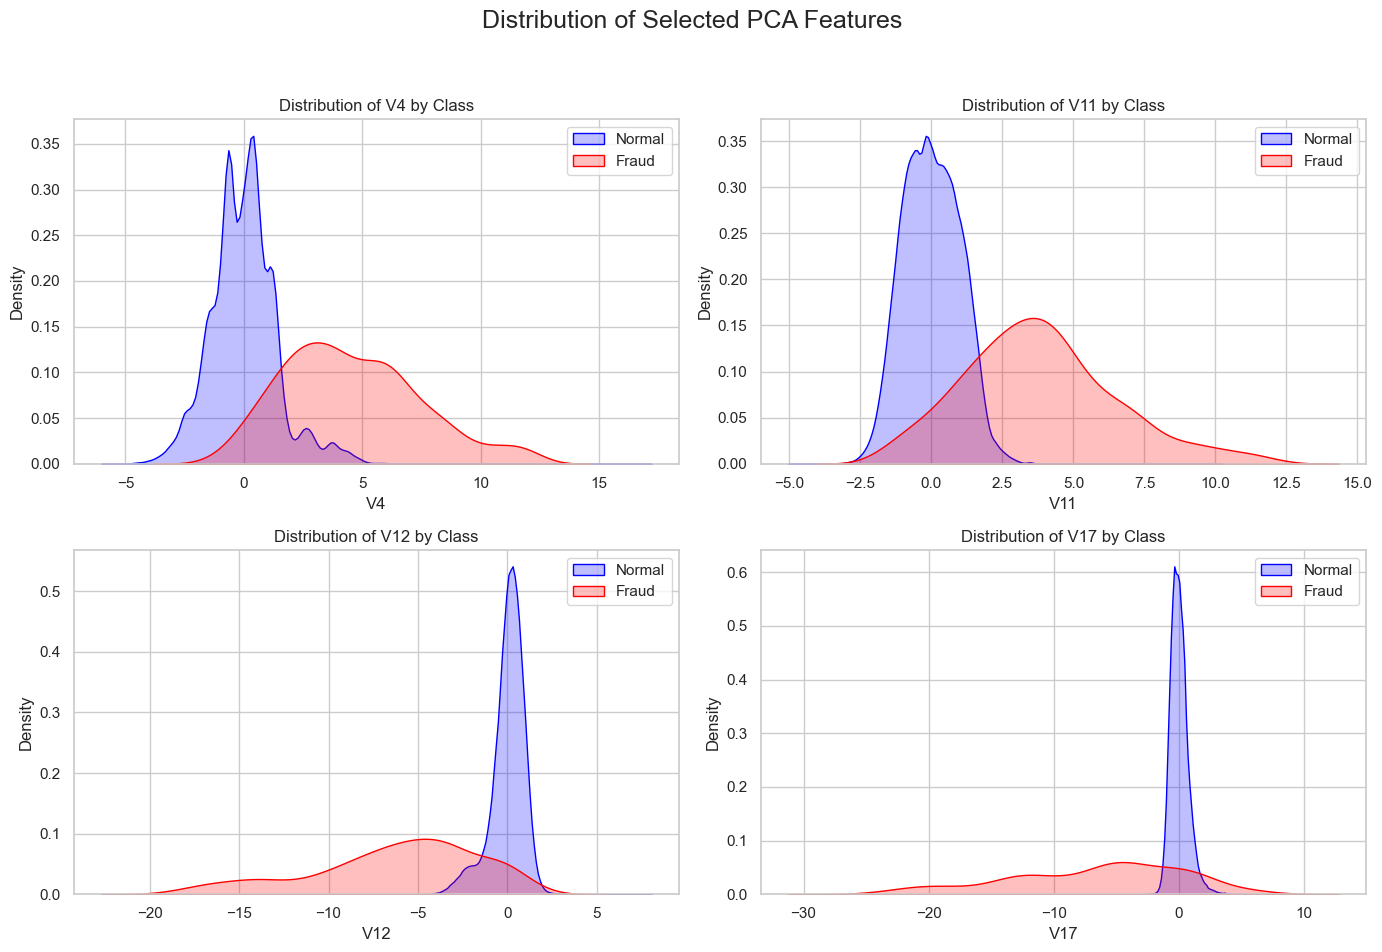

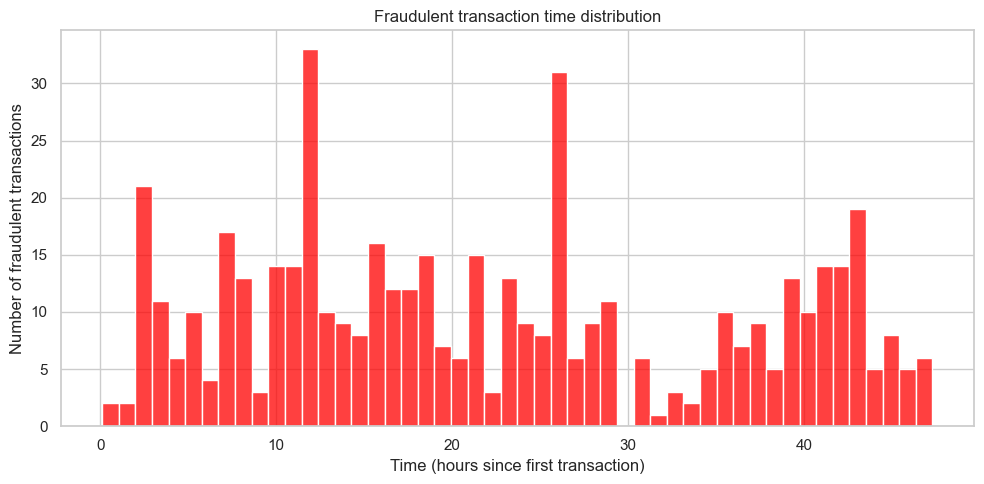

In [3]:
df = pd.read_csv("C:\Group_Project_ML2\dataset\creditcard.csv")
sns.set(style="whitegrid")

# 1. Class Distribution Chart
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0: Normal, 1: Fraud)', fontsize=14)
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.show()
plt.savefig("C:/Group_Project_ML2/visualizations/1_class_distribution.png")


# 2. Amount Chart by Class
features_to_plot = ['V4', 'V11', 'V12', 'V17']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.kdeplot(df[df['Class'] == 0][feature], ax=axes[i], label='Normal', shade=True, color='blue')
    sns.kdeplot(df[df['Class'] == 1][feature], ax=axes[i], label='Fraud', shade=True, color='red')
    axes[i].set_title(f'Distribution of {feature} by Class', fontsize=12)
    axes[i].legend()

plt.suptitle('Distribution of Selected PCA Features', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("C:/Group_Project_ML2/visualizations/2_pca_feature_distributions.png")
plt.show()

# 3. Fraud Time Chart
fraud_df = df[df['Class'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(fraud_df['Time'] / 3600, bins=50, color='red')
plt.title("Fraudulent transaction time distribution")
plt.xlabel("Time (hours since first transaction)")
plt.ylabel("Number of fraudulent transactions")
plt.tight_layout()
plt.savefig("C:/Group_Project_ML2/visualizations/3_fraud_over_time.png")
plt.show()

# Train_test and scale datadata

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[y_train == 0])  # Only normal data for training
x_test_scaled = scaler.transform(x_test)

# Evaluation

In [5]:
print("\n" + "="*50)
print(" ONE-CLASS SVM ")
print("="*50)

svm = OneClassSVM(kernel='rbf', gamma=0.05, nu=0.01)
svm.fit(x_train_scaled)
y_pred_svm = svm.predict(x_test_scaled)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

# === Evaluation ===
print(" One-Class SVM Results: ")
print(classification_report(y_test, y_pred_svm))


 ONE-CLASS SVM 
 One-Class SVM Results: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.80      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



# Confusion Matrix

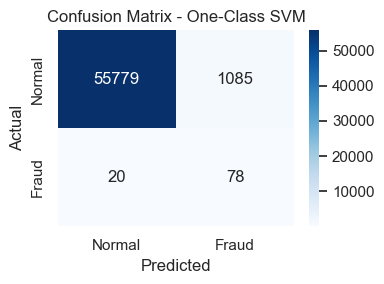

In [6]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - One-Class SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve

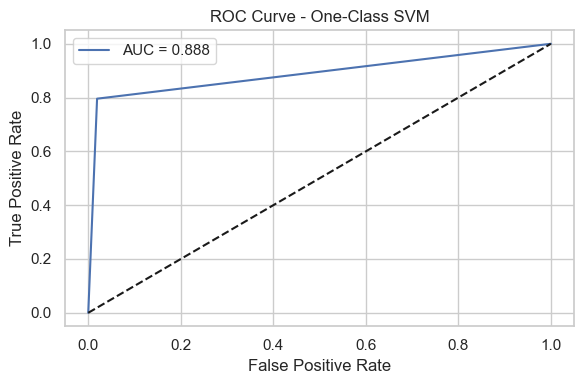

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_svm):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - One-Class SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve

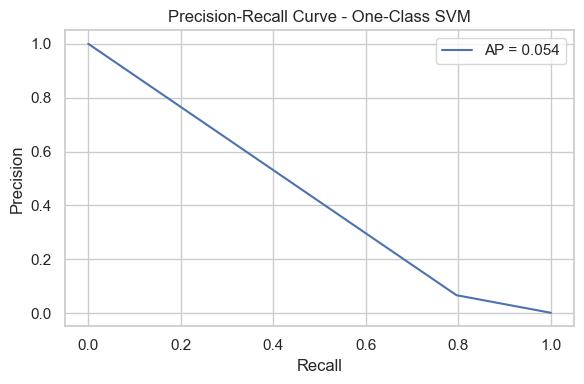

In [8]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_svm)
ap_score = average_precision_score(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - One-Class SVM')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()